In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime 

In [100]:
data = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(358, inplace=True)
data.drop(357, inplace=True)
data["Proportion of Weekly Results"] = np.empty_like(data["Date"])
data["Date"] = pd.to_datetime(data["Date"], format = "%yyyy-%mm-%dd").dt.day_name()
print(type(data["Date"][0]))
data

<class 'str'>


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Proportion of Weekly Results
0,Saturday,560,manly,20380,1899,0,2,17,37,29,12,2,1970-01-01 00:00:00.000000000
1,Friday,559,molar,21204,1973,0,4,21,38,26,9,1,1970-01-01 00:00:00.000000119
2,Thursday,558,havoc,20001,1919,0,2,16,38,30,12,2,1970-01-01 00:00:00.000000000
3,Wednesday,557,impel,20160,1937,0,3,21,40,25,9,1,1970-01-01 00:00:00.000000119
4,Tuesday,556,condo,20879,2012,0,2,17,35,29,14,3,1970-01-01 00:00:00.000000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Thursday,208,abbey,132726,3345,1,2,13,29,31,20,3,1970-01-01 00:00:00.000000032
353,Wednesday,207,favor,137586,3073,1,4,15,26,29,21,4,1970-01-01 00:00:00.000000033
354,Tuesday,206,drink,153880,3017,1,9,35,34,16,5,1,1970-01-01 00:00:00.000000034
355,Monday,205,query,107134,2242,1,4,16,30,30,17,2,1970-01-01 00:00:00.000000035


In [99]:
# c_df = pd.read_csv('corrected_data.csv')
# c_df
# c_df["Day of Week"] = data["Date"]
# c_df = c_df.to_csv("corrected_weekdays_data.csv")

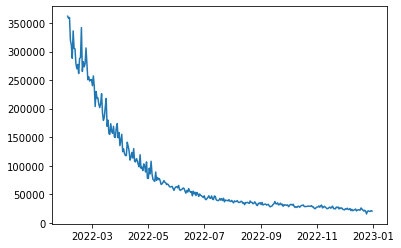

In [13]:
linspace = np.linspace(0, 332, 360)
plt.plot(data['Date'][:332], data['Number of  reported results'][:332])

In [ ]:
x = 359 - np.array([i for i in range(332)])
y = data['Number of  reported results'][:332]

a = 350000
b = -10
c = 50

def exp_func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(lin_func, x, np.log(y), p0=(a, b))

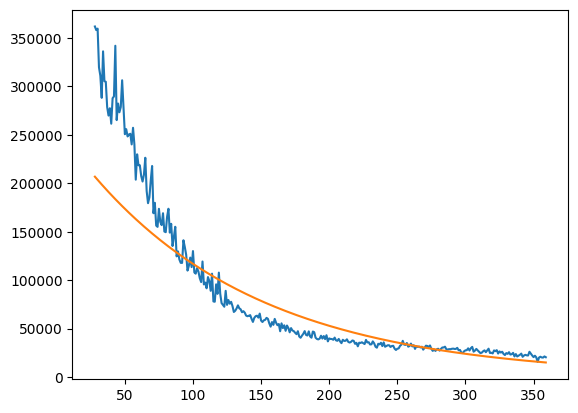

In [98]:
plt.plot(x,y)
plt.plot(x, np.exp(lin_func(x, *popt)))

In [47]:
popt

NameError: name 'popt' is not defined

In [89]:
sum = 0
count = 0

while(count < 357):
    sum += data["Number of  reported results"][count]
    if count % 7 == 6:
        for i in range(count - 6, count + 1):
            data["Proportion of Weekly Results"][i] = data["Number of  reported results"][i] / sum
        sum = 0
    count += 1
    
    
    
            
    
    

/var/folders/t0/75071t057mj9v1sl_fygq22w0000gn/T/ipykernel_81630/1623920794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Proportion of Weekly Results"][i] = data["Number of  reported results"][i] / sum
/var/folders/t0/75071t057mj9v1sl_fygq22w0000gn/T/ipykernel_81630/1623920794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Proportion of Weekly Results"][i] = data["Number of  reported results"][i] / sum


In [82]:
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,Saturday,560,manly,0.147479,1899,0,2,17,37,29,12,2
1,Friday,559,molar,0.153442,1973,0,4,21,38,26,9,1
2,Thursday,558,havoc,0.144737,1919,0,2,16,38,30,12,2
3,Wednesday,557,impel,0.145887,1937,0,3,21,40,25,9,1
4,Tuesday,556,condo,0.151090,2012,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
352,Thursday,208,abbey,0.132970,3345,1,2,13,29,31,20,3
353,Wednesday,207,favor,0.137839,3073,1,4,15,26,29,21,4
354,Tuesday,206,drink,0.154163,3017,1,9,35,34,16,5,1
355,Monday,205,query,0.107331,2242,1,4,16,30,30,17,2


<AxesSubplot:xlabel='Date'>

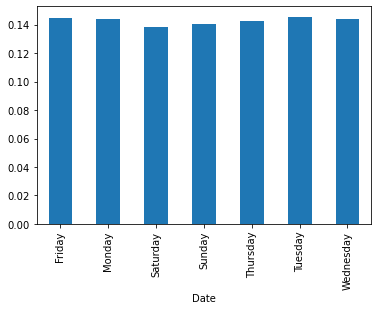

In [83]:
data[['Date', 'Number of  reported results']].groupby('Date').mean().plot(kind='bar', legend=None)


ValueError: time data '5' does not match format '%yyyy-%mm-%dd' (match)